In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plot
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler as Zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as DataSplit
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from keras.utils import np_utils
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


# 1. Data load

In [2]:
# 2 classes
data = pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data.shape

(310, 7)

In [4]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [5]:
data["class"].value_counts() # Imbalanced dataset

Abnormal    210
Normal      100
Name: class, dtype: int64

# Data Encoding

In [6]:
encoder = LabelEncoder()
Y = data['class']
encoded_Y = encoder.fit_transform(Y)

y = np_utils.to_categorical(encoded_Y)
y = pd.DataFrame(data=y, columns=['Abnormal','Normal'])

y1 = y.head(3)
y2 = y.tail(3)
conc_y = pd.concat([y1, y2], axis=0, ignore_index=True)
conc_y

,Abnormal,Normal
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0


# Data split

In [7]:
X = data
X_train, X_test, y_train, y_test = DataSplit(X,y,test_size=0.33)

Trainset = pd.concat([X_train, y_train], axis=1)
Testset = pd.concat([X_test, y_test], axis=1)

In [8]:
human = Trainset.drop(['Abnormal','Normal'], axis=1)
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)

In [9]:
human.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Abnormal
139,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,Abnormal
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Abnormal
297,45.575482,18.759135,33.774143,26.816347,116.797007,3.131910,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
77,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Abnormal
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,Normal
157,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,Abnormal
245,47.805559,10.688698,54.000000,37.116861,125.391138,-0.402523,Normal
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,Normal


In [10]:
X_test.to_csv('testset.csv',index=False)
X_test.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
240,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538
181,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411
253,63.792425,21.345323,66.000000,42.447102,119.550391,12.382604
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549
293,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759
182,75.437748,31.539454,89.600000,43.898294,106.829590,54.965789
15,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825
17,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020
277,65.756348,13.206926,44.000000,52.549422,129.393573,-1.982120


# 2. Data analysis
This section analyze the training dataset. Testset should be unseen data

In [11]:
human["pelvic_incidence"].describe()

count    207.000000
mean      60.994613
std       17.094744
min       26.147921
25%       46.539971
50%       61.411737
75%       74.517049
max      118.144655
Name: pelvic_incidence, dtype: float64

Abnormal    144
Normal       63
Name: class, dtype: int64

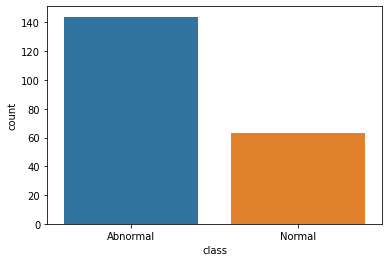

In [12]:
# Imbalanced dataset
sns.countplot(x="class", data=human)
human.loc[:,'class'].value_counts()

In [13]:
human.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

# (1) Boxplot (instead of Histogram)

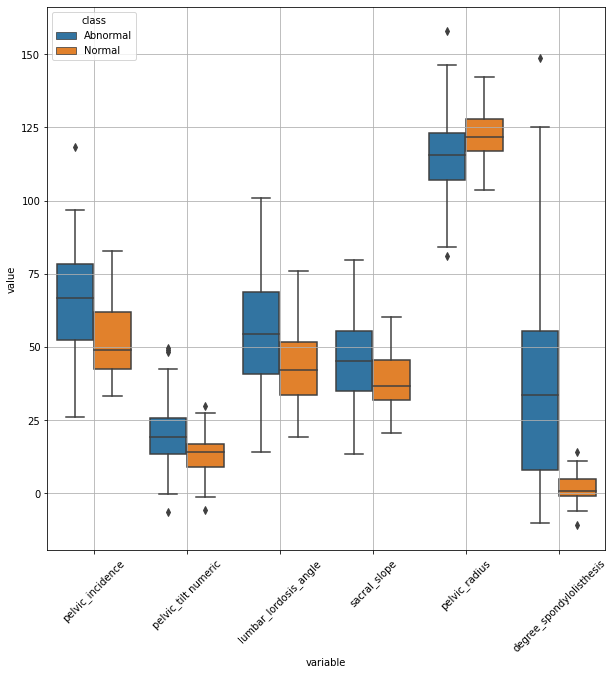

In [14]:
plot.figure(figsize=(10,10))

melted_human = pd.melt(human, id_vars = "class", value_vars = list(human.columns[0:6]))
sns.boxplot(x = "variable", y="value", hue = "class", data = melted_human)
plot.grid()
plot.xticks(rotation=45)
plot.show()

# (2) Pair plot

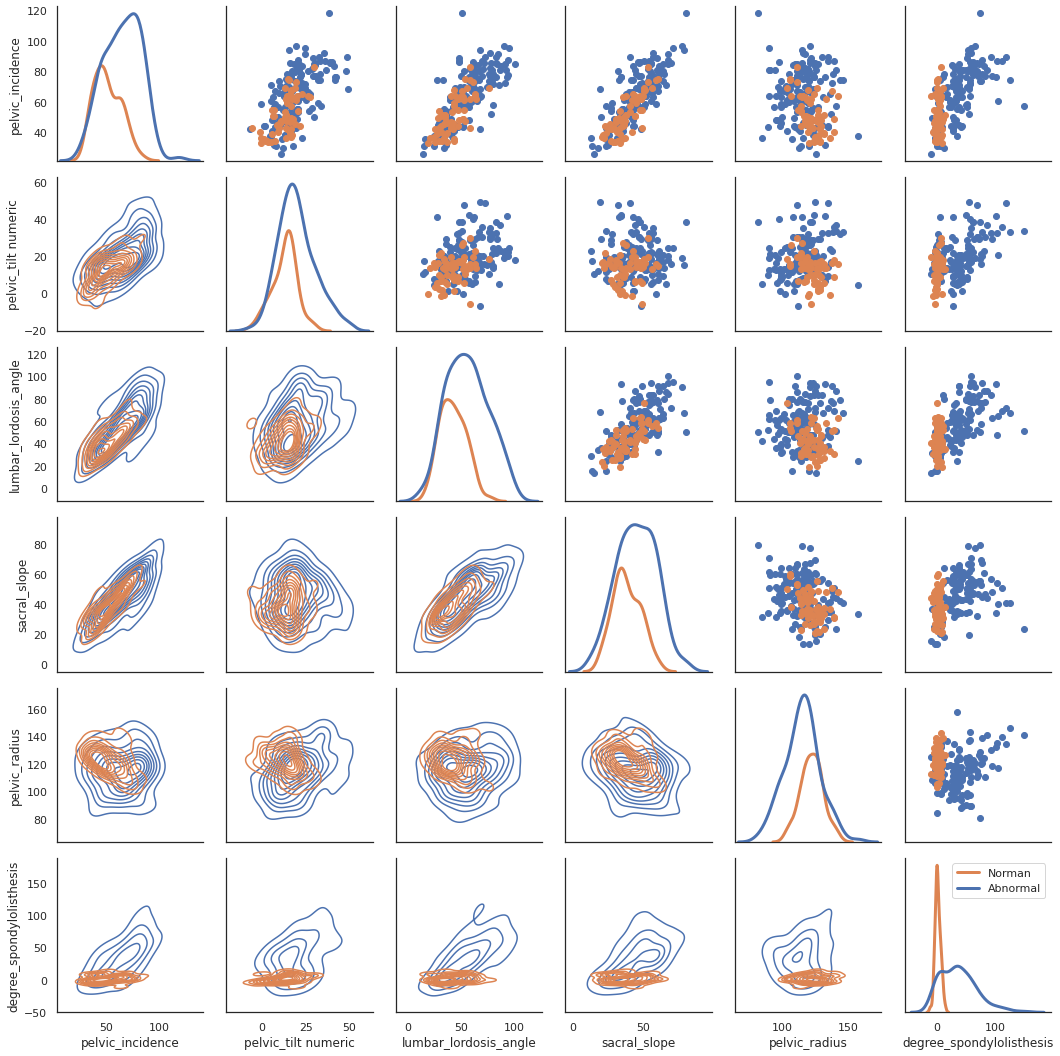

In [15]:
# sns.pairplot(iris.drop("Id", axis=1), hue = "Species", size = 3) # Simple version

sns.set(style = "white")
g = sns.PairGrid(human,diag_sharey = False, hue="class", data=human)
g.map_lower(sns.kdeplot, camp="Blues_d")
g.map_upper(plot.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plot.savefig('Pairplot.png')
plot.legend(['Norman','Abnormal'])
plot.show()

# (3) Pearson's correlation

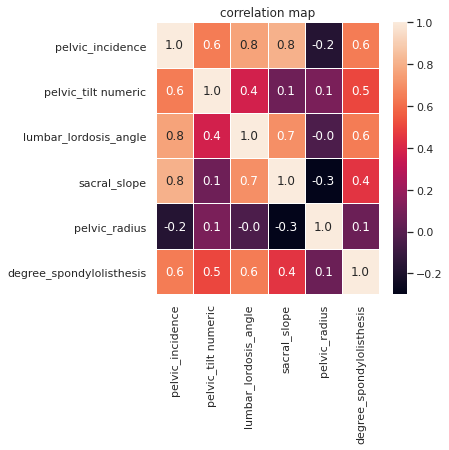

In [16]:
f, ax = plot.subplots(figsize = (5,5))
sns.heatmap(human.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.title('correlation map')
plot.show()

# (4) Spearman's rank correlation

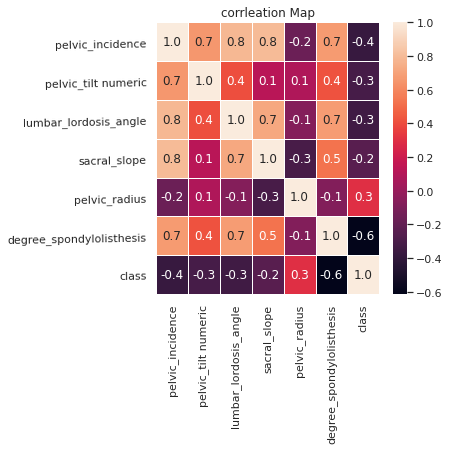

In [17]:
ranked_data = human.rank()
f, ax = plot.subplots(figsize = (5,5))
sns.heatmap(ranked_data.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.yticks(rotation = 1)
plot.title('corrleation Map')
plot.savefig('heatmap_Spearman.png')
plot.show()

# (5) Missing data

In [18]:
total = human.isnull().sum().sort_values(ascending=False)
percent = (human.isnull().sum()/human.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
pelvic_incidence,0,0.0
pelvic_tilt numeric,0,0.0
lumbar_lordosis_angle,0,0.0
sacral_slope,0,0.0
pelvic_radius,0,0.0


# 3. Train the models

In [19]:
X_train_d = Zscore().fit_transform(X_train)
X_test_d = Zscore().fit_transform(X_test)
    
def train_and_test(model):
    model = OneVsRestClassifier(model).fit(X_train_d,y_train)
    prediction = model.predict(X_test_d)
    accuracy = round(accuracy_score(prediction,y_test)*100, 2) # .2f
    print("Model:",model," Training_accuracy: ", accuracy, "%")
    return accuracy, prediction, model


# Logistic regression
LR_pred = train_and_test(LR())

# SVM
SVM_acc, SVM_pred, SVM_model = train_and_test(SVM(kernel='rbf'))

# KNN
KNN_pred = train_and_test(KNN(n_neighbors = 10))

# Random forest
RF_pred = train_and_test(RF(n_estimators=200))

# Naive Bayes
NB_pred = train_and_test(NB())

print("SVM shows the highest accuracy in this example")

Model: OneVsRestClassifier(estimator=LogisticRegression())  Training_accuracy:  77.67 %
Model: OneVsRestClassifier(estimator=SVC())  Training_accuracy:  83.5 %
Model: OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=10))  Training_accuracy:  73.79 %
Model: OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=200))  Training_accuracy:  75.73 %
Model: OneVsRestClassifier(estimator=GaussianNB())  Training_accuracy:  76.7 %
SVM shows the highest accuracy in this example


In [20]:
y_test_int = np.argmax(np.array(y_test), axis=1)
SVM_pred_int = np.argmax(SVM_pred, axis=1)
y_test.value_counts()

Abnormal  Normal
1.0       0.0       66
0.0       1.0       37
dtype: int64

Text(0.5, 1.0, 'Confusion matrix (number)')

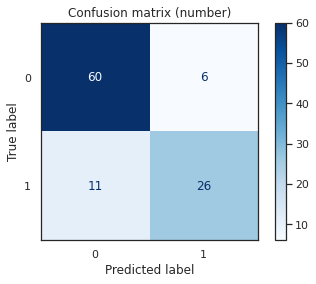

In [21]:
cm = confusion_matrix(y_test_int, SVM_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plot.title("Confusion matrix (number)")